<a href="https://colab.research.google.com/github/Kirankavala143/APSSDC-AIML/blob/main/APSSDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import the data set and do the data preprocessing

In [3]:
#Problem statement
#Develop a sentiment analysis model to classify reiviews as positive or negative.
#Preprocess the review text using techniques such as lower casing, removing stop words and lematization
#use the trained model accurately predict the sentiment of new , unseen reviews.

In [4]:
import pandas as pd



In [5]:
data = pd.read_csv('Reviews.csv')

In [6]:
print(data)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [7]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [8]:
#we can review the top 5 rows
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [9]:
#Top 10 rows
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [10]:
data.tail() # last 5 rows

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [11]:
data.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [12]:
data.info() # data set info like data types, entries of data set, memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [13]:
data.isnull().sum() # checking the null values.

Review    0
Liked     0
dtype: int64

In [14]:
data.duplicated() # checking the duplicated values


0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
pip install wordcloud

In [18]:
from wordcloud import WordCloud

In [19]:
combined_text = " ".join(data['Review']) #combine all review text into one string

In [20]:
wordcloud = WordCloud(width=800 ,height = 400 ,background_color = 'white').generate(combined_text)

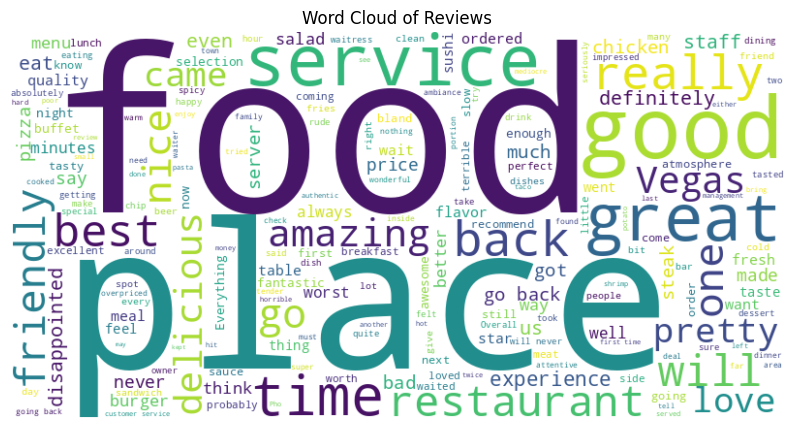

In [21]:
#plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [22]:
from collections import Counter

In [23]:
targeted_words = ['good','great','amazing','bad']
all_words = " ".join(data['Review']).lower().split() #flatten reviews into a single list of words
word_counts = Counter(all_words)
target_word_count = {word: word_counts[word] for word in targeted_words}


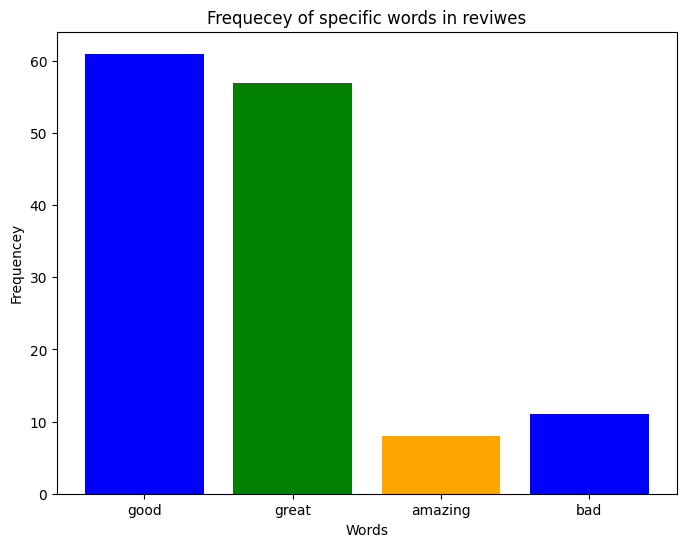

In [24]:
#plotting
plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys(), target_word_count.values(), color=['blue', 'green', 'orange','blue'])
plt.xlabel('Words')
plt.ylabel('Frequencey')
plt.title('Frequecey of specific words in reviwes')
plt.show()

In [25]:
lowercases_text = data['Review'].str.lower()
print(lowercases_text)


#tokenization
from nltk.tokenize import word_tokenize
import nltk

# Download the 'punkt' tokenizer
nltk.download('punkt')
data['Tokens'] = data['Review'].apply(word_tokenize)
print(data ['Tokens'] )
data.info()


#removing stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['Tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])
print(data['Tokens'])


#stemming
from nltk.stem import PorterStemmer
Stemmer = PorterStemmer()
data['stemmed'] = data['Review'].apply(lambda x: " ".join([Stemmer.stem(word) for word in word_tokenize(x)]))
print(data['stemmed'])
data['stemmed'].value_counts()


#Lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
data['Lemmatized'] = data['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in word_tokenize(x)]))
print(data['Lemmatized'])


#Remove numbers
import re
data['No_Numbers'] = data['Review'].apply(lambda x: re.sub(r'\d+',' ',x))
print(data['No_Numbers'])
data['cleaned_text'] = data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]',' ',x))
print(data['cleaned_text'])
data.info()


#Normalization
!pip install contractions
import contractions
data['Expanded'] = data['Review'].apply(contractions.fix)
print(data['Expanded'])


!pip install emoji
import emoji
data['Emoji'] = data['Review'].apply(emoji.demojize)
print(data['Emoji'])


#Removinh HTML tags
!pip install beautifulsoup4
from bs4 import BeautifulSoup
data['Cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())
print(data['Cleaned'])

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                            [Wow, ..., Loved, place, .]
1                                       [Crust, good, .]
2                        [Not, tasty, texture, nasty, .]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4               [The, selection, menu, great, prices, .]
                             ...                        
995        [I, think, food, flavor, texture, lacking, .]
996                       [Appetite, instantly, gone, .]
997          [Overall, I, impressed, would, go, back, .]
998    [The, whole, experience, underwhelming, ,, I, ...
999    [Then, ,, I, n't, wasted, enough, life, ,, pou...
Name: Tokens, Length: 1000, dtype: object
0                               wow ... love thi place .
1                                    crust is not good .
2               not tasti and the textur wa just nasti .
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...              

[nltk_data] Downloading package wordnet to /root/nltk_data...


0                             Wow ... Loved this place .
1                                    Crust be not good .
2              Not tasty and the texture be just nasty .
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly go .
997     Overall I be not impress and would not go back .
998    The whole experience be underwhelming , and I ...
999    Then , as if I have n't waste enough of my lif...
Name: Lemmatized, Length: 1000, dtype: object
0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...          

<ipython-input-25-2b7bbfe88741>:69: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['Cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())
